# About MNIST Dataset
- MNIST is a dataset consisting of 70000 black-and-white images of handwritten digits.
- Each image has `28 x 28` pixels.
- There are a total of 10 classes (0 to 9).
- Each pixel is encoded as an integer from 0 to 255. Lower pixel values represent darker colors (black) and higher pixel values represent light colors (white).
- 60000 images are used as a part of training and 10000 images are used as a part of testing.

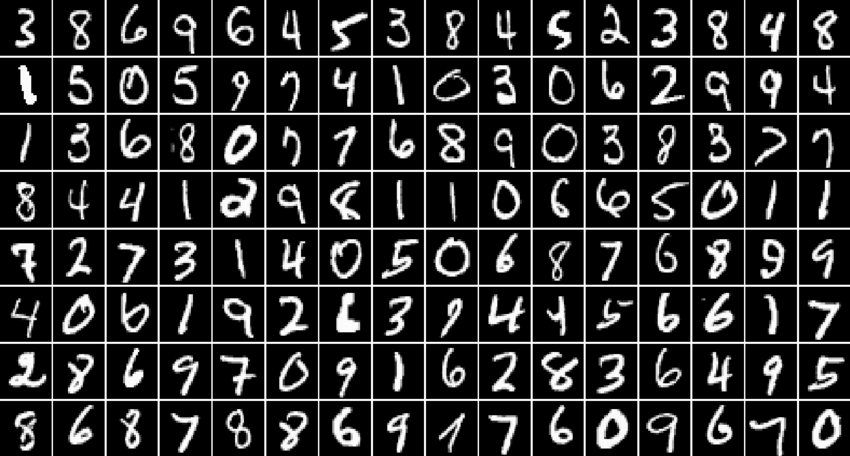

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")

# Overview Of CNN Model

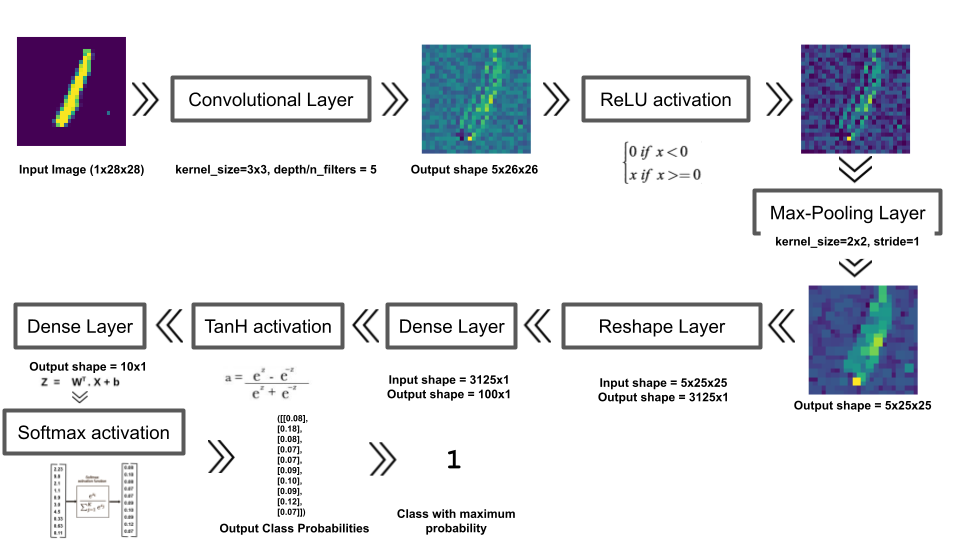

A base `Layer` class is defined to specify the default layer properties that will be inherited by the `Convolutional`, `Activation`, `MaxPool`, `Reshape`, `Dense` classes. All of these classes are derived classes of the `Layer` class.

The `Layer` class has 2 attributes,
- `forward`: Takes in the input to the layer and returns the output via the specified calculation for each layer.
- `backward`: Takes in the output gradient to update the layer's parameters and return the input gradient.

In [3]:
# defining the Layer class
class Layer:
    def __init__(self):
        self.input = None
        self.output = None
    
    def forward(self, input):
        # return output
        pass

    def backward(self, output_gradient, learning_rate):
        # update parameters and return input gradient
        pass

Forward propagation is simply feeding the data in the forward direction to the model. In this case the model is a Neural Network and each of the training images is processed through the `Convolutional`, `Activation`, `MaxPool`, `Reshape`, `Dense` layers

# Convolutional Layer
The `Convolutional` class inherits from the `Layer` class and takes input parameters,
- Input shape.
- Kernel size.
- Depth or Number of Kernels or Filters for the layer.

Defining and initializing the input and output shapes of input image, kernel size and bias.

In [4]:
class Convolutional(Layer):
    def __init__(self, input_shape, kernel_size, depth):
        # input_shape is 3 dimensional (d x h x w), 
        # input_depth = number of image input channels, input_height = image height and input_width = image width
        input_depth, input_height, input_width = input_shape

        self.input_shape = input_shape

        # depth = number of kernels in the convolutional layer
        self.depth = depth
        
        # number of channels in the image are 3 for a RGB image and 2 for a grayscale image
        self.input_depth = input_depth

        # calculating the convolutional layer output of 3 dimensions
        self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)

        # kernel_shape specifies the shape of the Kernel produced
        # it has 4 dimensions, depth = number of Kernels (depth), input_shape = image channels, kernel_size = kernel dimension
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)

        # randomly initializing the Kernel weights
        self.kernels = np.random.randn(*self.kernels_shape)

        # randomly initializing the biases
        self.biases = np.random.rand(*self.output_shape)

    def forward(self, input):
        pass

    def backward(self, output_gradient, learning_rate):
        pass

After taking these parameters, the `Convolutional` layer processes the inputs through the forward and backward functions during model training.

### Forward propagation in `Convolutional` layer
- During the forward propagation, the `Convolutional` layer iterates through each filter, applying it to every possible location within the input image channels. At each location, the filter is convolved with the corresponding region of the input, producing a scalar value that represents the filter's response at thet position. This process generates a set of feature maps, each representing the activation of a specific filter across the entire input image.

    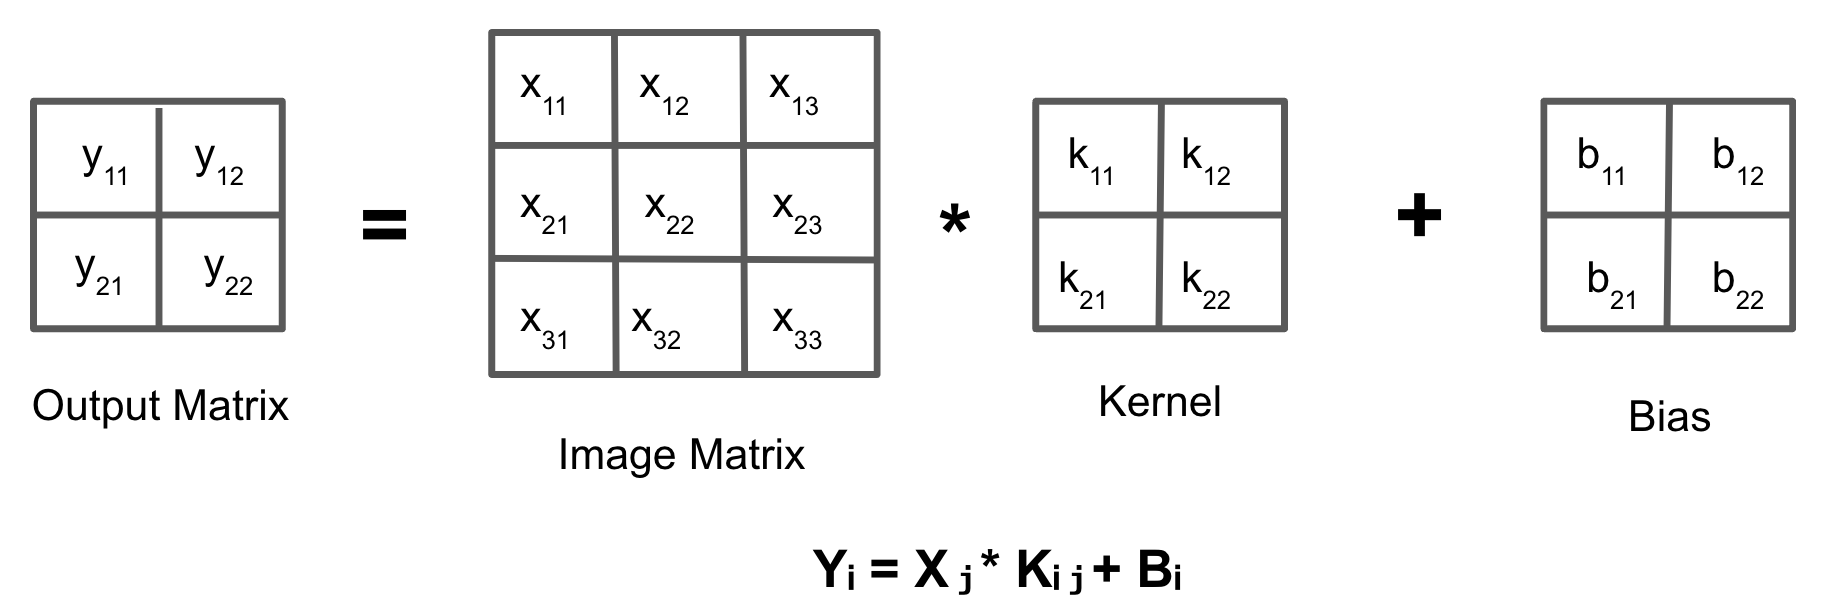

- Forward propagation for `Convolutional` layer is mathematically expressed as, $Y_i = \sum_{j = 1}^n X_j * K_{ij} + B_i$. Where, i = 1, ...., depth. Where,
    - Y is the output of the convolutional operation which is equal to the sum of bias and sum of cross-correlations between the input image ($X_j$) and the `Convolutional` Kernel ($k_{ij}$).
- This equation is intended to represent the output calculation for each filter within the `Convolutional` layer, iterating through all filters (depth) to produce a set of feature maps and each resulting from the application of a specific filter to the entire input image.
- The following is obtained after expanding the above equation,

    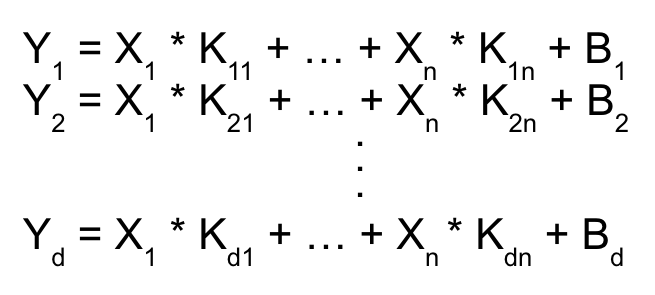

    Where, d = depth or number of filters, n = input depth.
- By using these equations, the filters are passed with their weights over the image matrix, to compute the output of the convolutional layer.

In [5]:
# the convolution operation is performed using correlate2d() method of scipy package
from scipy import signal

class Convolutional(Layer):

    def __init__(self, input_shape, kernel_size, depth):
        # input_shape is 3 dimensional (d x h x w), 
        # input_depth = number of image input channels, input_height = image height and input_width = image width
        input_depth, input_height, input_width = input_shape

        self.input_shape = input_shape

        # depth = number of kernels in the convolutional layer
        self.depth = depth
        
        # number of channels in the image are 3 for a RGB image and 2 for a grayscale image
        self.input_depth = input_depth

        # calculating the convolutional layer output of 3 dimensions
        self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)

        # kernel_shape specifies the shape of the Kernel produced
        # it has 4 dimensions, depth = number of Kernels (depth), input_shape = image channels, kernel_size = kernel dimension
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)

        # randomly initializing the Kernel weights
        self.kernels = np.random.randn(*self.kernels_shape)

        # randomly initializing the biases
        self.biases = np.random.rand(*self.output_shape)

    # forward pass takes input and computes the output by applying the above convolution
    def forward(self, input):
        self.input = input

        # initialize the output matix with output_shape
        self.output = np.zeros(self.output_shape)

        # 2 nested for loops, first one to traverse all the Filters (depth), second one to traverse all the channels (input_depth) in every input image
        for i in range(self.depth):
            for j in range(self.input_depth):

                # output is calculated by adding the biases of the layer with the cross correlation between image and the Kernel, "valid" stands for no padding.
                self.output[i] += self.biases[i] + signal.correlate2d(self.input[j], self.kernels[i, j], "valid")

        return self.output
    
    def backward(self, output_gradient, learning_rate):
        pass

### Back propagation in `Convolutional` layer
